In [9]:
import shutil
from PIL import Image
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
df = pd.read_csv(Path('..', 'data', 'archive', 'ISIC_2019_Training_Metadata.csv'))

In [12]:
from src.ml_logic.preproc import preprocessing_tabulaire

In [13]:
df = preprocessing_tabulaire()

In [14]:
target = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

X = df.drop(columns=target, axis=1)
y = df[target]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [16]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
s_scaler.fit(X_train)

X_train = s_scaler.transform(X_train)
X_test = s_scaler.transform(X_test)

In [17]:
from tensorflow.keras import models, layers

In [18]:
y_new = pd.read_csv('../data/archive/ISIC_2019_Training_GroundTruth.csv')

In [19]:
from tensorflow.keras import optimizers


In [20]:
def initialize_model():
    
    model = models.Sequential()
    model.add(layers.Dense(30, activation='relu', input_dim=11))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dropout(rate=0.2))


    model.add(layers.Dense(9, activation='softmax'))

    opt = optimizers.Adam(
    learning_rate=0.01, beta_1=0.9, beta_2=0.99)
    model.compile(loss='categorical_crossentropy', optimizer=opt,
                  metrics=['accuracy'])

    return model 


model = initialize_model()

2022-11-30 23:40:48.809526: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dejan/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-30 23:40:48.810424: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-30 23:40:48.810794: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-G9O3IB9I): /proc/driver/nvidia/version does not exist
2022-11-30 23:40:48.814210: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the app

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:

es = EarlyStopping()

history = model.fit(X_train, y_train, 
          batch_size=16, 
          epochs=20, 
          validation_split=0.3,
          callbacks=[es])


#history = model.fit(X_train, y_train,validation_data = (X_test, y_test), 
#batch_size=32, epochs=20, verbose = 0)

Epoch 1/20
770/770 [==============================] - 4s 4ms/step - loss: 1.3338 - accuracy: 0.5221 - val_loss: 1.2236 - val_accuracy: 0.5562
Epoch 2/20
770/770 [==============================] - 3s 3ms/step - loss: 1.2796 - accuracy: 0.5315 - val_loss: 1.2226 - val_accuracy: 0.5617


In [23]:
results = model.evaluate(s_scaler.transform(X_test), y_test)
results

 23/236 [=>............................] - ETA: 0s - loss: 3.2297 - accuracy: 0.4918

/home/dejan/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


236/236 [==============================] - 1s 2ms/step - loss: 3.0440 - accuracy: 0.5072


[3.043998956680298, 0.5072329044342041]

In [24]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

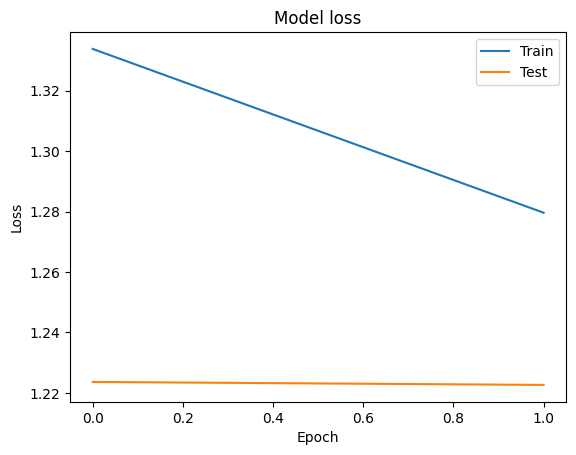

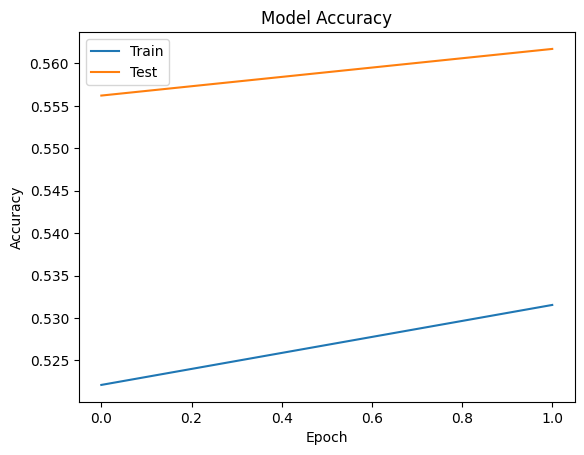

In [26]:
import matplotlib.pyplot as plt
plot_loss_accuracy(history)